### The effect of the Euro Transition (2003 > 2009) on the exchange rate between the Slovakian Koruna and the Euro
#### We have chosen this investigation due to data avaliability and the potential interesting effect of Euro adoption on the SKK/EUR exchange rate.

The dataset we'll use contains Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union. 
Slovakia adopted the Euro on January 1, 2009.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import re
import datetime as dt
from datetime import datetime
from matplotlib.dates import date2num
import numpy as np

Now its time to read in our data and filter just for our currency of interest. We can then think about any cleaning steps required.

In [2]:
exchange_rates = pd.read_csv('data/euro-daily-hist_1999_2022.csv')

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [3]:
exchange_rates_skk = exchange_rates.iloc[:,[0,36]]
exchange_rates_skk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Period\Unit:      6456 non-null   object
 1   [Slovak koruna ]  2608 non-null   object
dtypes: object(2)
memory usage: 101.0+ KB


Our initial analysis on the data is:

- We have NULL values in the [Slovak koruna ] column. These are represented by numpy NaN and will need to be considered. We may have other values that are not numeric. These missing values most likely represent the period after koruna depreication, or a day where no data was collected.

- __Column headers need to be tidied up.__

- [Slovak koruna ] needs to be converted to float, Period\Unit to be converted to datetime. These steps are to aid our analysis.

In [4]:
clean_column_headers = []

for column in exchange_rates_skk.columns:
    column = column.replace("[","")
    column = column.replace("]","")
    column = column.lower()
    column = column.strip()
    column = column.replace(":","")
    column = re.sub(r'[\\:]', ' ', column) #backslashes are harder to deal with so we have to use RegEx
    column = column.replace(" ","_")

    clean_column_headers.append(column)

exchange_rates_skk.columns = clean_column_headers #assign our new column headers to our dataset


Our initial analysis on the data is:

- __We have NULL values in the [Slovak koruna ] column. These are represented by numpy NaN and will need to be considered. We may have other values that are not numeric. These missing values most likely represent the period after koruna depreication, or a day where no data was collected.__

- Column headers need to be tidied up.

- __[Slovak koruna ] needs to be converted to float, Period\Unit to be converted to datetime. These steps are to aid our analysis.__

In [5]:
print(exchange_rates_skk['period_unit'].nunique()) #number of unique values in the period_unit column.
#This matches to the number of rows in our data set meaning we have one entry for each day.

#convert to datetime to aid our analysis
exchange_rates_skk['period_unit'] = pd.to_datetime(exchange_rates_skk['period_unit'])
#sort by date earliest to latest
exchange_rates_skk.sort_values('period_unit', inplace=True) 
exchange_rates_skk.reset_index(drop=True, inplace=True) #reset the index so we can splice effectively

#we cannot convert our columns to floats if there are some entries which are non numeric.
#This next step will check for offending rows

filtered_df = exchange_rates_skk[exchange_rates_skk['slovak_koruna'].apply(lambda x: isinstance(x, str) and not x.replace('.', '').isdigit())]
#rows with non nan or '.' characters. I
print(filtered_df)
#it looks as if it is mostly '-' so lets replace those with a dash and see if that fixes are issue

exchange_rates_skk = exchange_rates_skk.replace('-', np.nan)

exchange_rates_skk['slovak_koruna'] = exchange_rates_skk['slovak_koruna'].astype(float)

6456
     period_unit slovak_koruna
259   1999-12-31             -
339   2000-04-21             -
340   2000-04-24             -
345   2000-05-01             -
515   2000-12-25             -
516   2000-12-26             -
520   2001-01-01             -
594   2001-04-13             -
595   2001-04-16             -
606   2001-05-01             -
776   2001-12-25             -
777   2001-12-26             -
780   2001-12-31             -
781   2002-01-01             -
844   2002-03-29             -
845   2002-04-01             -
867   2002-05-01             -
1037  2002-12-25             -
1038  2002-12-26             -
1042  2003-01-01             -
1119  2003-04-18             -
1120  2003-04-21             -
1128  2003-05-01             -
1298  2003-12-25             -
1299  2003-12-26             -
1303  2004-01-01             -
1374  2004-04-09             -
1375  2004-04-12             -
1624  2005-03-25             -
1625  2005-03-28             -
1820  2005-12-26             -
189

In [6]:
exchange_rates_skk = exchange_rates_skk.dropna()

Our column names are tidied, our columns are converted and now we will filter our data for our date range.

The major steps to prepare for and then adopt the Euro occured between: 2004 - 2008.

In June 2004 Slovakia joined the European Union.

The Slovak Koruna was officially replaced by the Euro on the first of January 2009.

To provide a good sample size date range this data will be filtered for the years 2003 > 2008 (inclusive).

In [7]:
exchange_rates_skk_prev = exchange_rates_skk[(exchange_rates_skk['period_unit'].dt.year < 2009) &
                                             (exchange_rates_skk['period_unit'].dt.year >2002)]
exchange_rates_skk_prev.reset_index(drop=True, inplace=True) #reset the index so we can splice effectively

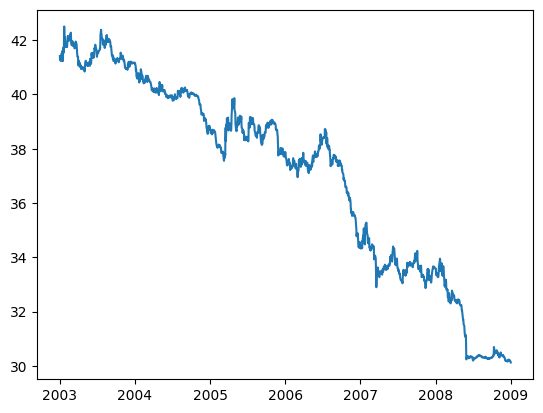

In [8]:
plt.plot(exchange_rates_skk_prev['period_unit'],exchange_rates_skk_prev['slovak_koruna'])

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning. They are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

As we are looking at a long-term range range of 6 years we will use a rolling mean of 50 days. This should make our trends more reliable and less susceptible to temporary flucations in price.

In [9]:
exchange_rates_skk_prev['rolling_mean'] = exchange_rates_skk_prev['slovak_koruna'].rolling(50).mean()

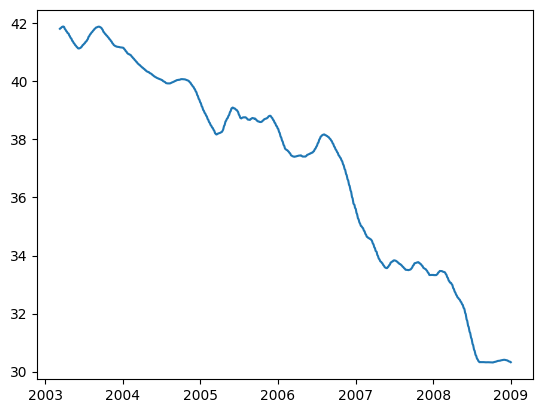

In [10]:
plt.plot(exchange_rates_skk_prev['period_unit'],exchange_rates_skk_prev['rolling_mean'])

Now it's time to annotate our graph with different important moments in the transition of Slovakia to adopting the EURO.

Using our datasources https://nbs.sk/en/about-the-bank/international-relations/nbs-in-eurosystem/euro-in-slovakia/ https://www.ecb.europa.eu/euro/changeover/slovakia/html/index.en.html https://www.ecb.europa.eu/pub/pdf/other/mb200806_focus11.en.pdf (as of: 07-01-2023) we can see some important milestones in the transition period which we will graphically display:

- Throughout 2003 - 2004: Slovakia initiates fiscal consolidation efforts, focusing on reducing budget deficits and public debt levels. Slovakia joins the EU on May 1, 2004.

- Throughout 2005: Slovakia undertakes structural reforms, including changes in the labor market, pension system reforms, and improvements in the business environment.

- 28 November 2005 Entry into the ERM II

- 2006 - 2008: Slovakia works on maintaining exchange rate stability by participating in the Exchange Rate Mechanism II (ERM II).  Market liberalization efforts continue, promoting competition and attracting foreign investments to spur economic growth.

- May 2008	Convergence reports of the European Commission and the ECB. The European Commission announced its recommendation for Slovakia to adopt the Euro.

- January 1, 2009: Slovakia officially adopts the Euro as its official currency, demonstrating compliance with the Eurozone criteria. Final exchange rate SKK 30.126.


From above, we could produce a graph for:

- 2003>2005

- 2006>2008

- 2008>2009

Our aim is to tell a story of how effective the measures by the European commission and the Slovak Central Bank were in strengthening the SKK before adoption of the EUR.

In [11]:
first_period_index_filter = (exchange_rates_skk_prev['period_unit'].dt.year > 2002) & (exchange_rates_skk_prev['period_unit'].dt.year < 2006)
second_period_index_filter = (exchange_rates_skk_prev['period_unit'].dt.year > 2005) & (exchange_rates_skk_prev['period_unit'].dt.year < 2008)
third_period_index_filter = (exchange_rates_skk_prev['period_unit'].dt.year > 2007) & (exchange_rates_skk_prev['period_unit'].dt.year < 2009)


first_period_rolling_mean_data = exchange_rates_skk_prev[first_period_index_filter]['rolling_mean'].to_list()
first_period_date_data = exchange_rates_skk_prev[first_period_index_filter]['period_unit'].to_list()

second_period_rolling_mean_data = exchange_rates_skk_prev[second_period_index_filter]['rolling_mean'].to_list()
second_period_date_data = exchange_rates_skk_prev[second_period_index_filter]['period_unit'].to_list()

third_period_rolling_mean_data = exchange_rates_skk_prev[third_period_index_filter]['rolling_mean'].to_list()
third_period_date_data = exchange_rates_skk_prev[third_period_index_filter]['period_unit'].to_list()


As well as the rolling 50 day average we will also graph the % change in the rates for each period. 

The formula to calculate the percentage change or improvement is:

Percentage Change = (New Rate − Old Rate) / Old Rate × 100

To calculate this we will use the rolling average. Process below.

In [12]:
#first period
first_period_subset = exchange_rates_skk_prev[first_period_index_filter]
first_period_subset.reset_index(drop=True, inplace=True) #reset the index so we can splice effectively

first_non_null_index_A = first_period_subset['rolling_mean'].first_valid_index()
start_rolling_mean_period_1 = first_period_subset.loc[first_non_null_index_A, 'rolling_mean']

last_non_null_index_A = first_period_subset['rolling_mean'].last_valid_index()
last_rolling_mean_period_1 = first_period_subset.loc[last_non_null_index_A, 'rolling_mean']

#second period
second_period_subset = exchange_rates_skk_prev[second_period_index_filter]
second_period_subset.reset_index(drop=True, inplace=True) #reset the index so we can splice effectively

first_non_null_index_A = second_period_subset['rolling_mean'].first_valid_index()
start_rolling_mean_period_2 = second_period_subset.loc[first_non_null_index_A, 'rolling_mean']

last_non_null_index_A = second_period_subset['rolling_mean'].last_valid_index()
last_rolling_mean_period_2 = second_period_subset.loc[last_non_null_index_A, 'rolling_mean']

#third period
third_period_subset = exchange_rates_skk_prev[third_period_index_filter]
third_period_subset.reset_index(drop=True, inplace=True) #reset the index so we can splice effectively

first_non_null_index_A = third_period_subset['rolling_mean'].first_valid_index()
start_rolling_mean_period_3 = third_period_subset.loc[first_non_null_index_A, 'rolling_mean']

last_non_null_index_A = third_period_subset['rolling_mean'].last_valid_index()
last_rolling_mean_period_3 = third_period_subset.loc[last_non_null_index_A, 'rolling_mean']

In [13]:
def percentage_change(start_rate,end_rate):
    return (end_rate - start_rate) / start_rate * 100

In [14]:
first_period_growth = percentage_change(last_rolling_mean_period_1,start_rolling_mean_period_1)
second_period_growth = percentage_change(last_rolling_mean_period_2,start_rolling_mean_period_2)
third_period_growth = percentage_change(last_rolling_mean_period_3,start_rolling_mean_period_3)

In [15]:
print(first_period_growth)
print(second_period_growth)
print(third_period_growth)

8.930239731719732
15.102108906565793
9.921432679573007


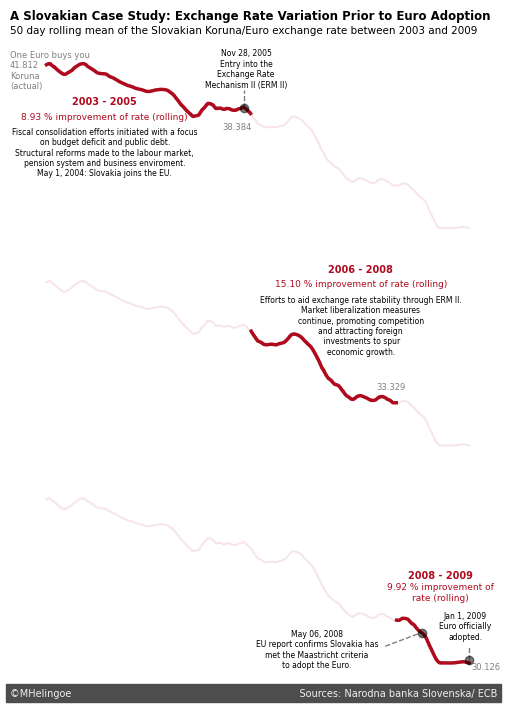

In [16]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(exchange_rates_skk_prev['period_unit'], exchange_rates_skk_prev['rolling_mean'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

#title text
ax1.text(11940.5, 45, 'A Slovakian Case Study: Exchange Rate Variation Prior to Euro Adoption',
         size=8.5, weight='bold')
ax1.text(11940.5, 44, '50 day rolling mean of the Slovakian Koruna/Euro exchange rate between 2003 and 2009',
         size=7.50) 

#first graph values       
ax1.plot(first_period_date_data, first_period_rolling_mean_data,
         color='#af0b1e', linewidth=2.5)

ax1.text(11940, 40.15, 'One Euro buys you\n41.812\nKoruna\n(actual)', alpha=0.5, fontsize=6)
ax1.text(13005, 37.25, '38.384', alpha=0.5, fontsize=6)
ax1.text(12415, 39, '2003 - 2005', color='#af0b1e',
         weight='bold', fontsize=7,horizontalalignment = 'center')
ax1.text(12415, 38, f'{first_period_growth:.2f} % improvement of rate (rolling)', color='#af0b1e',
        fontsize=6.5,horizontalalignment = 'center')
ax1.text(12415, 34, f'Fiscal consolidation efforts initiated with a focus\non budget deficit and public debt.\nStructural reforms made to the labour market,\npension system and business enviroment.\nMay 1, 2004: Slovakia joins the EU.',
        color='#000000', fontsize=5.5,horizontalalignment = 'center')
ax1.axvline(x=['2005-11-28'], ymin=0.71,ymax=0.81,linewidth=1, color='#000000',alpha=0.5,linestyle ='dashed', marker='o',markevery=[0])
ax1.text(13125, 40.25,'Nov 28, 2005\nEntry into the\nExchange Rate\nMechanism II (ERM II)', color='#000000',
        fontsize=5.5, horizontalalignment = 'center')


#second graph values
ax2.plot(second_period_date_data, second_period_rolling_mean_data,
         color='#af0b1e', linewidth=2.5)   
ax2.text(13700, 42.5, '2006 - 2008', color='#af0b1e', weight='bold', fontsize=7,horizontalalignment = 'center')
ax2.text(13700, 41.5, f'{second_period_growth:.2f} % improvement of rate (rolling)', color='#af0b1e',
        fontsize=6.5,horizontalalignment = 'center')
ax2.text(13700, 36.75, 'Efforts to aid exchange rate stability through ERM II.\nMarket liberalization measures\ncontinue, promoting competition\nand attracting foreign\n investments to spur\neconomic growth.',
        color='#000000', fontsize=5.5,horizontalalignment = 'center')
ax2.text(13780, 34.25, '33.329', alpha=0.5, fontsize=6)


#third graph values
ax3.plot(third_period_date_data, third_period_rolling_mean_data,
         color='#af0b1e', linewidth=2.5)
ax3.text(14100, 36.25, '2008 - 2009', color='#af0b1e', weight='bold', fontsize=7,horizontalalignment = 'center')
ax3.text(14100, 34.75, f'{third_period_growth:.2f} % improvement of\nrate (rolling)', color='#af0b1e',
        fontsize=6.5,horizontalalignment = 'center')
ax3.text(13480, 30,'May 06, 2008\nEU report confirms Slovakia has\nmet the Maastricht criteria\nto adopt the Euro.', color='#000000',
        fontsize=5.5, horizontalalignment = 'center')
ax3.axvline(x=['2008-12-31'], ymin=0.06,ymax=0.14,linewidth=1, color='#000000',alpha=0.5,linestyle ='dashed', marker='o',markevery=[0])
ax3.text(14225, 32,'Jan 1, 2009\nEuro officially\nadopted.', color='#000000',
        fontsize=5.5, horizontalalignment = 'center')
##additional helper plot for the sloped line
ax3.plot([datetime.strptime('2007-11-06', '%Y-%m-%d'),datetime.strptime('2008-05-06', '%Y-%m-%d')], [31.5,32.4575],
         linewidth=1, color='#000000',alpha=0.5,linestyle='dashed', marker='o',markevery=[1])
ax3.text(14255, 29.85,'30.126', alpha=0.5, fontsize=6)


ax3.text(11940, 28, '©MHelingoe' + ' '*73 + 'Sources: Narodna banka Slovenska/ ECB',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=7)


plt.show()


The graph above shows the strong performance of the Slovakian Koruna over the Euro between 2003 to Euro adoption in 2009 with an overall rate reduction of 38.79%.

It can be concluded that fiscal measures by the National Bank of Slovakia, tied with the strict guidelines and assistance from the European Central Bank (ECB) including but not limited to the ERM II, worked extremely well and Slovakia can be seen as a success story of the measures required to prepare for Euro adoption.

It should be added that using the Koruna/Euro exchange rate as an indicator of Koruna strength is one-dimesional and does not take into account flucuations in the Euro price. For a more complete study, other rates such as the Real Exchange Rate or/ and the Trade-Weighted Exchange Rate Index could be used. 

Further studies could include the correlation between exchange rate and economic indicators such as GDP, inflation and employment rates or governement debt levels. I would expect the Pearson correlation coefficient values between these metrics and the exchange rate to be strong.  